# Image Blending

In [6]:
import numpy as np
import cv2 as cv
from PIL import Image
from PIL import ImageEnhance
# Please run the previous line if ipyplot package is not found
import ipyplot
import os

In [4]:
def blendImages(src, target):
    '''
        Blending source image on top of target image using various blending options. Input images must be in same size.

        src    - Crease image that we want to layer on top
        target - Base image

        Returns blended image (PIL Image Class)

        ## Formula for Linear Light and Vivid Light obtained from 
        http://www.deepskycolors.com/archive/2010/04/21/formulas-for-Photoshop-blending-modes.html
        https://photoblogstop.com/photoshop/photoshop-blend-modes-explained
    '''
    src = np.asarray(src)
    target = np.asarray(target)
    out = np.empty(src.shape, dtype = 'float')
    alpha = np.index_exp[:, :, 3:]
    rgb = np.index_exp[:, :, :3]
    src_rgb = src[rgb]/255.0
    target_rgb = target[rgb]/255.0
 
    # Vivid Light
#     out[rgb] = (src_rgb>0.5) * (1-(1-target_rgb)/(2*(src_rgb-0.5))) +\
#                 (src_rgb<=0.5) * (target_rgb/(1-2*src_rgb))

    # Linear Light
#     out[rgb] = (src_rgb>0.5) * (target_rgb+2*(src_rgb-0.5)) +\
#                 (src_rgb<=0.5) * (target_rgb+(2*src_rgb-1))
    
#     Custom Light
    out[rgb] = (src_rgb>0.5) * (target_rgb*0.5+src_rgb*0.5) +\
                (src_rgb<=0.5) * (target_rgb*0.5+src_rgb*0.5-1)
    
    out[rgb] *= 255
    out[alpha] = 255
    np.clip(out,0,255) # keeps pixel values to within 0 and 255
    out = out.astype('uint8') # convert float values to unsigned int-8 for image
    out = Image.fromarray(out,'RGBA')
    return out


In [5]:
def changeImageSize(maxWidth, maxHeight, image):
    '''
        Resize images to the width and height inputted 

        maxWidth  - desired width of image (int)
        maxHeight - desired height of image (int)
        image     - image file to be resized

        Returns resized image (PIL Image Class)
    '''
#     widthRatio  = maxWidth/image.size[0]
#     heightRatio = maxHeight/image.size[1]

#     newWidth    = int(widthRatio*image.size[0])
#     newHeight   = int(heightRatio*image.size[1])

    newImage    = image.resize((maxWidth, maxHeight))
    return newImage

# Process one set of blending to test

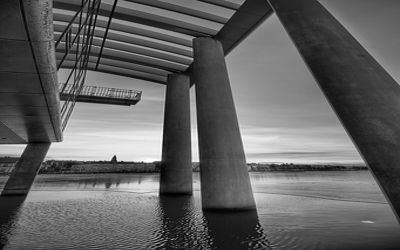

In [ ]:
import PIL.ImageOps

# Take two images for blending them together   
base_image = Image.open("images0/images/0/5.jpg")
crease_layer = Image.open("crack_images4/aug_0_2809.png")

# Make the images of uniform size
base_image = changeImageSize(400, 250, base_image)
crease_layer = changeImageSize(400, 250, crease_layer)

base_image = base_image.convert("LA")
crease_layer = crease_layer.convert("RGBA")

# output_image = blendImages(crease_layer, base_image)
# output_image.save('hi.png')
# output_image

# base_image.paste(crease_layer, (0, 0), crease_layer)
base_image

# Augmenting Crack Images

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import imageio
import numpy as np

datagen = ImageDataGenerator(brightness_range=(0.7,1.2),rotation_range=100, width_shift_range=0.1,
height_shift_range=0.1,shear_range=0.1, 
zoom_range=0.1,channel_shift_range = 100, horizontal_flip=True,vertical_flip=True)

In [ ]:
image_path = 'crack_4.png'
image = np.expand_dims(imageio.imread(image_path), 0)
save_path = '/crack_images6'

datagen.fit(image)

In [ ]:
i = 0
for x, val in zip(datagen.flow(image,  #image we chose
        save_to_dir=save_path,     #this is where we figure out where to save
        save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='png'),range(995)) :     # here we define the number of images we want to augment
    print(f"{i}/1000", end = "\r")
    i+=1
    pass

# Applying Different Crack Layer to Base Image

In [ ]:
# Take two images for blending them together   
import os
from PIL import Image
base_path = 'images0/images/9/'
crease_path = 'crack_images5/'

base_images = os.listdir(base_path)
crease_images = os.listdir(crease_path)


for i in range(len(base_images)):
    base_image = base_images[i]
    crease_layer = crease_images[i%len(crease_images)]
    
    base_layer = Image.open(base_path+base_image).convert('RGBA')
    crease_layer = Image.open(crease_path+crease_layer).convert("RGBA")
    
    base_layer = changeImageSize(400, 250, base_layer)
    crease_layer = changeImageSize(400, 250, crease_layer)
    
    base_layer.paste(crease_layer, (0, 0), crease_layer)
    output_image = base_layer.convert('LA')
    
    output_image.save(f'train10/train_{base_image.split(".")[0]}.png')
    print(f'Saving train_{base_image.split(".")[0]}.png... {len(base_images)-i} images left', end='\r')
    

# Convert Label Images in Folder to BlackWhite

In [ ]:
folder_path = 'images0/images/9/'
i = 0
for image in os.listdir(folder_path):

    temp = Image.open(folder_path+image)
    temp = changeImageSize(400, 250, temp)
    temp = temp.convert('LA')
    temp.save(f'label10/{image.split(".")[0]}.png')
    print(f'Saving {i} out of {len(os.listdir(folder_path))}..', end='\r')
    i += 1
print('Done!')

Done!g 9999 out of 10000..
